In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.io as scio
import warnings
import seaborn as sns
from scipy.optimize import root
from matplotlib.font_manager import FontProperties

warnings.filterwarnings('ignore', category=RuntimeWarning)

rural = np.arange(0, 60, 2)
urban = np.arange(1, 60, 2)
east = np.r_[0, 1, 2, 3, 4, 5, 16, 17, 18, 19, 20, 21, 24, 25, 28, 29, 36, 37, 40, 41]
middle = np.r_[6, 7, 22, 23, 26, 27, 30, 31, 32, 33, 34, 35]
west = np.r_[8, 9, 10, 11, 12, 13, 14, 15, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
high_flow_in = [0, 1, 2, 3, 8, 10, 12, 18, 20] 
low_flow_in = [4, 5, 6, 7, 9, 11, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29]

font_path = r'C:\Windows\Fonts\simsun.ttc'
chinese_font = FontProperties(fname=r'C:\Windows\Fonts\simsun.ttc')
english_font = FontProperties(fname=r'C:\Windows\Fonts\Arial.ttf')
pd.options.display.float_format = '{:.3f}'.format

def gini_index(array):
    cum_wealths = np.cumsum(sorted(np.append(array, 0)))
    sum_wealths = cum_wealths[-1]
    xarray = np.array(range(0, len(cum_wealths))) / float(len(cum_wealths)-1)
    yarray = cum_wealths / sum_wealths
    B = np.trapz(yarray, x=xarray)
    A = 0.5 - B
    return A / (A + B)

In [ ]:
# analyze the simulations

simulation_results = pd.read_csv('./data/Simulation_results.csv')
simulation_results = simulation_results.round(3)
simulation_results = simulation_results[simulation_results['dW_country']>2]

dW_country_both = 6.4031
dV_country_both = 3.8140
dincgini_country_both = -9.4432

pareto_sample = simulation_results[
    (simulation_results['dW_country'] > dW_country_both) &
    (simulation_results['dV_country'] > dV_country_both) &
    (simulation_results['dincgini_country'] < dincgini_country_both)
]

print(len(simulation_results), str(round(len(pareto_sample) / len(simulation_results) * 100, 2))+'%')


In [ ]:
simulation_results['total_avg2'] = (1 + simulation_results['dW_country'] / 100) ** (1/3) * (1 + simulation_results['dV_country'] / 100) ** (1/3) * (1 + simulation_results['dincgini_country'] / 100) ** (-1/3)

simulation_results = simulation_results.sort_values(by=['total_avg2'], ascending=False).reset_index(drop=True)
best_policy_dW = simulation_results.loc[0, 'dW_country']
best_policy_dincgini = simulation_results.loc[0, 'dincgini_country']
best_policy_dV = simulation_results.loc[0, 'dV_country']
simulation_results

dK0   dK1   dK2   dK3   dK4   dK5   dK6   dK7   dK8   dK9  ...  dK56  \
0      1.000 1.135 1.000 1.711 1.000 1.001 1.000 1.170 1.000 1.010  ... 1.000   
1      1.000 1.177 1.000 1.428 1.000 1.032 1.000 1.100 1.000 1.025  ... 1.000   
2      1.000 1.005 1.000 1.186 1.000 1.054 1.000 1.135 1.000 1.037  ... 1.000   
3      1.000 1.119 1.000 1.092 1.000 1.062 1.000 1.077 1.000 1.002  ... 1.000   
4      1.000 1.045 1.000 1.021 1.000 1.099 1.000 1.235 1.000 1.023  ... 1.000   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
489804 1.000 1.371 1.000 1.700 1.000 1.007 1.000 1.106 1.000 1.164  ... 1.000   
489805 1.000 1.815 1.000 1.042 1.000 1.012 1.000 1.044 1.000 1.158  ... 1.000   
489806 1.000 1.784 1.000 1.038 1.000 1.084 1.000 1.009 1.000 1.093  ... 1.000   
489807 1.000 1.636 1.000 1.050 1.000 1.084 1.000 1.039 1.000 1.123  ... 1.000   
489808 1.000 1.685 1.000 1.241 1.000 1.058 1.000 1.058 1.000 1.098  ... 1.000   

        dK57  dK58  dK59  dW_country  dincgini_country  dV_country  \
0      1.807 1.000 1.041       8.036            -8.382       4.694   
1      1.524 1.000 1.007       8.196            -7.934       4.941   
2      1.758 1.000 1.108       7.510            -8.989       4.349   
3      1.297 1.000 1.095       7.641            -8.684       4.556   
4      1.317 1.000 1.048       7.691            -8.671       4.512   
...      ...   ...   ...         ...               ...         ...   
489804 1.004 1.000 1.205       6.382            -8.607       3.750   
489805 1.306 1.000 1.240       6.638            -8.271       3.870   
489806 1.049 1.000 1.179       6.606            -8.289       3.833   
489807 1.834 1.000 1.145       6.249            -8.797       3.597   
489808 1.130 1.000 1.090       6.565            -8.295       3.842   

        total_avg2  dK_high_flow_in  dK_low_flow_in  
0            1.073            1.301             NaN  
1            1.072            1.282             NaN  
2            1.072            1.185             NaN  
3            1.072            1.221             NaN  
4            1.072            1.232             NaN  
...            ...              ...             ...  
489804       1.065            1.243             NaN  
489805       1.065            1.193             NaN  
489806       1.065            1.209             NaN  
489807       1.065            1.202             NaN  
489808       1.065            1.231             NaN  

[489809 rows x 66 columns]

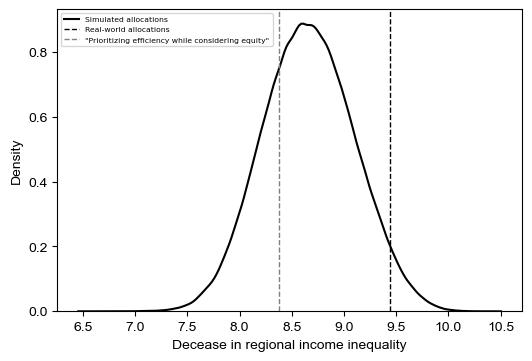

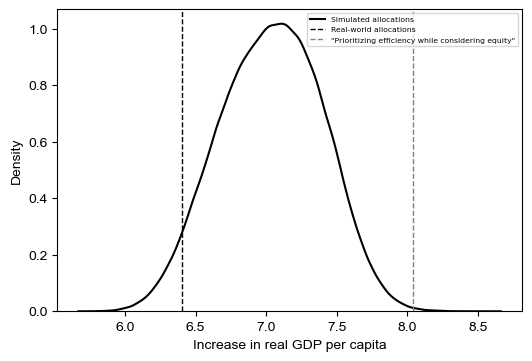

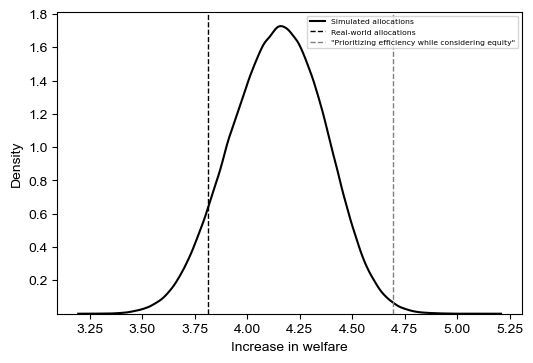

In [ ]:
# policy intentions (Figure 4)

## provincial income inequality
fig, ax = plt.subplots(dpi=100)
sns.kdeplot(-simulation_results.dincgini_country, color='k', linestyle='-', label='Simulated allocations')
ax.axvline(-dincgini_country_both, color='0.0', ls='--', lw=1, label='Real-world allocations')
ax.axvline(-best_policy_dincgini, color='0.5', ls='--', lw=1, label='"Prioritizing efficiency while considering equity"')
ax.set_ylabel('Density', fontproperties=english_font)
ax.set_xlabel('Decease in regional income inequality', fontproperties=english_font)

for tick in ax.get_yticklabels() + ax.get_yticklabels() + ax.get_xticklabels() + ax.get_xticklabels():
    tick.set_fontproperties(english_font)
plt.legend(fontsize=5.5)
plt.show()

## real gdp per capita
fig, ax = plt.subplots(dpi=100)
sns.kdeplot(simulation_results.dW_country, color='k', linestyle='-', label='Simulated allocations')
ax.axvline(dW_country_both, color='0.0', ls='--', lw=1, label='Real-world allocations')
ax.axvline(best_policy_dW, color='0.5', ls='--', lw=1, label='"Prioritizing efficiency while considering equity"')
ax.set_ylabel('Density', fontproperties=english_font)
ax.set_xlabel('Increase in real GDP per capita', fontproperties=english_font)

for tick in ax.get_yticklabels() + ax.get_yticklabels() + ax.get_xticklabels() + ax.get_xticklabels():
    tick.set_fontproperties(english_font)
plt.legend(fontsize=5.5)
plt.show()

## welfare
fig, ax = plt.subplots(dpi=100)
sns.kdeplot(simulation_results.dV_country, color='k', linestyle='-', label='Simulated allocations')
ax.axvline(dV_country_both, color='0.0', ls='--', lw=1, label='Real-world allocations')
ax.axvline(best_policy_dV, color='0.5', ls='--', lw=1, label='"Prioritizing efficiency while considering equity"')
ax.set_ylabel('Density', fontproperties=english_font)
ax.set_xlabel('Increase in welfare', fontproperties=english_font)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])

for tick in ax.get_yticklabels() + ax.get_yticklabels() + ax.get_xticklabels() + ax.get_xticklabels():
    tick.set_fontproperties(english_font)
plt.legend(fontsize=5.5)
plt.show()


In [ ]:
## better land allocations (1)

simulation_results = simulation_results.sample(frac=1, random_state=42).reset_index(drop=True)
simulation_results['dK_high_flow_in'] = np.nan
simulation_results['dK_low_flow_in'] = np.nan

for index, row in simulation_results.iterrows():
    if np.isnan(simulation_results.iloc[index, -1])==True:
        each_dK_urban = np.array(simulation_results.iloc[index, 1:60:2])
        each_dK_high_flow_in = each_dK_urban[high_flow_in].mean()
        #each_dK_low_flow_in = each_dK_urban[low_flow_in].mean()
        simulation_results.loc[index, 'dK_high_flow_in'] = each_dK_high_flow_in
        #simulation_results.loc['dK_low_flow_in'] = each_dK_low_flow_in
        print(str(index) + '/' + str(len(simulation_results)), end='\r')

#simulation_results.to_csv('./data/Simulation_results.csv', index=False)
print('\nFinished!')

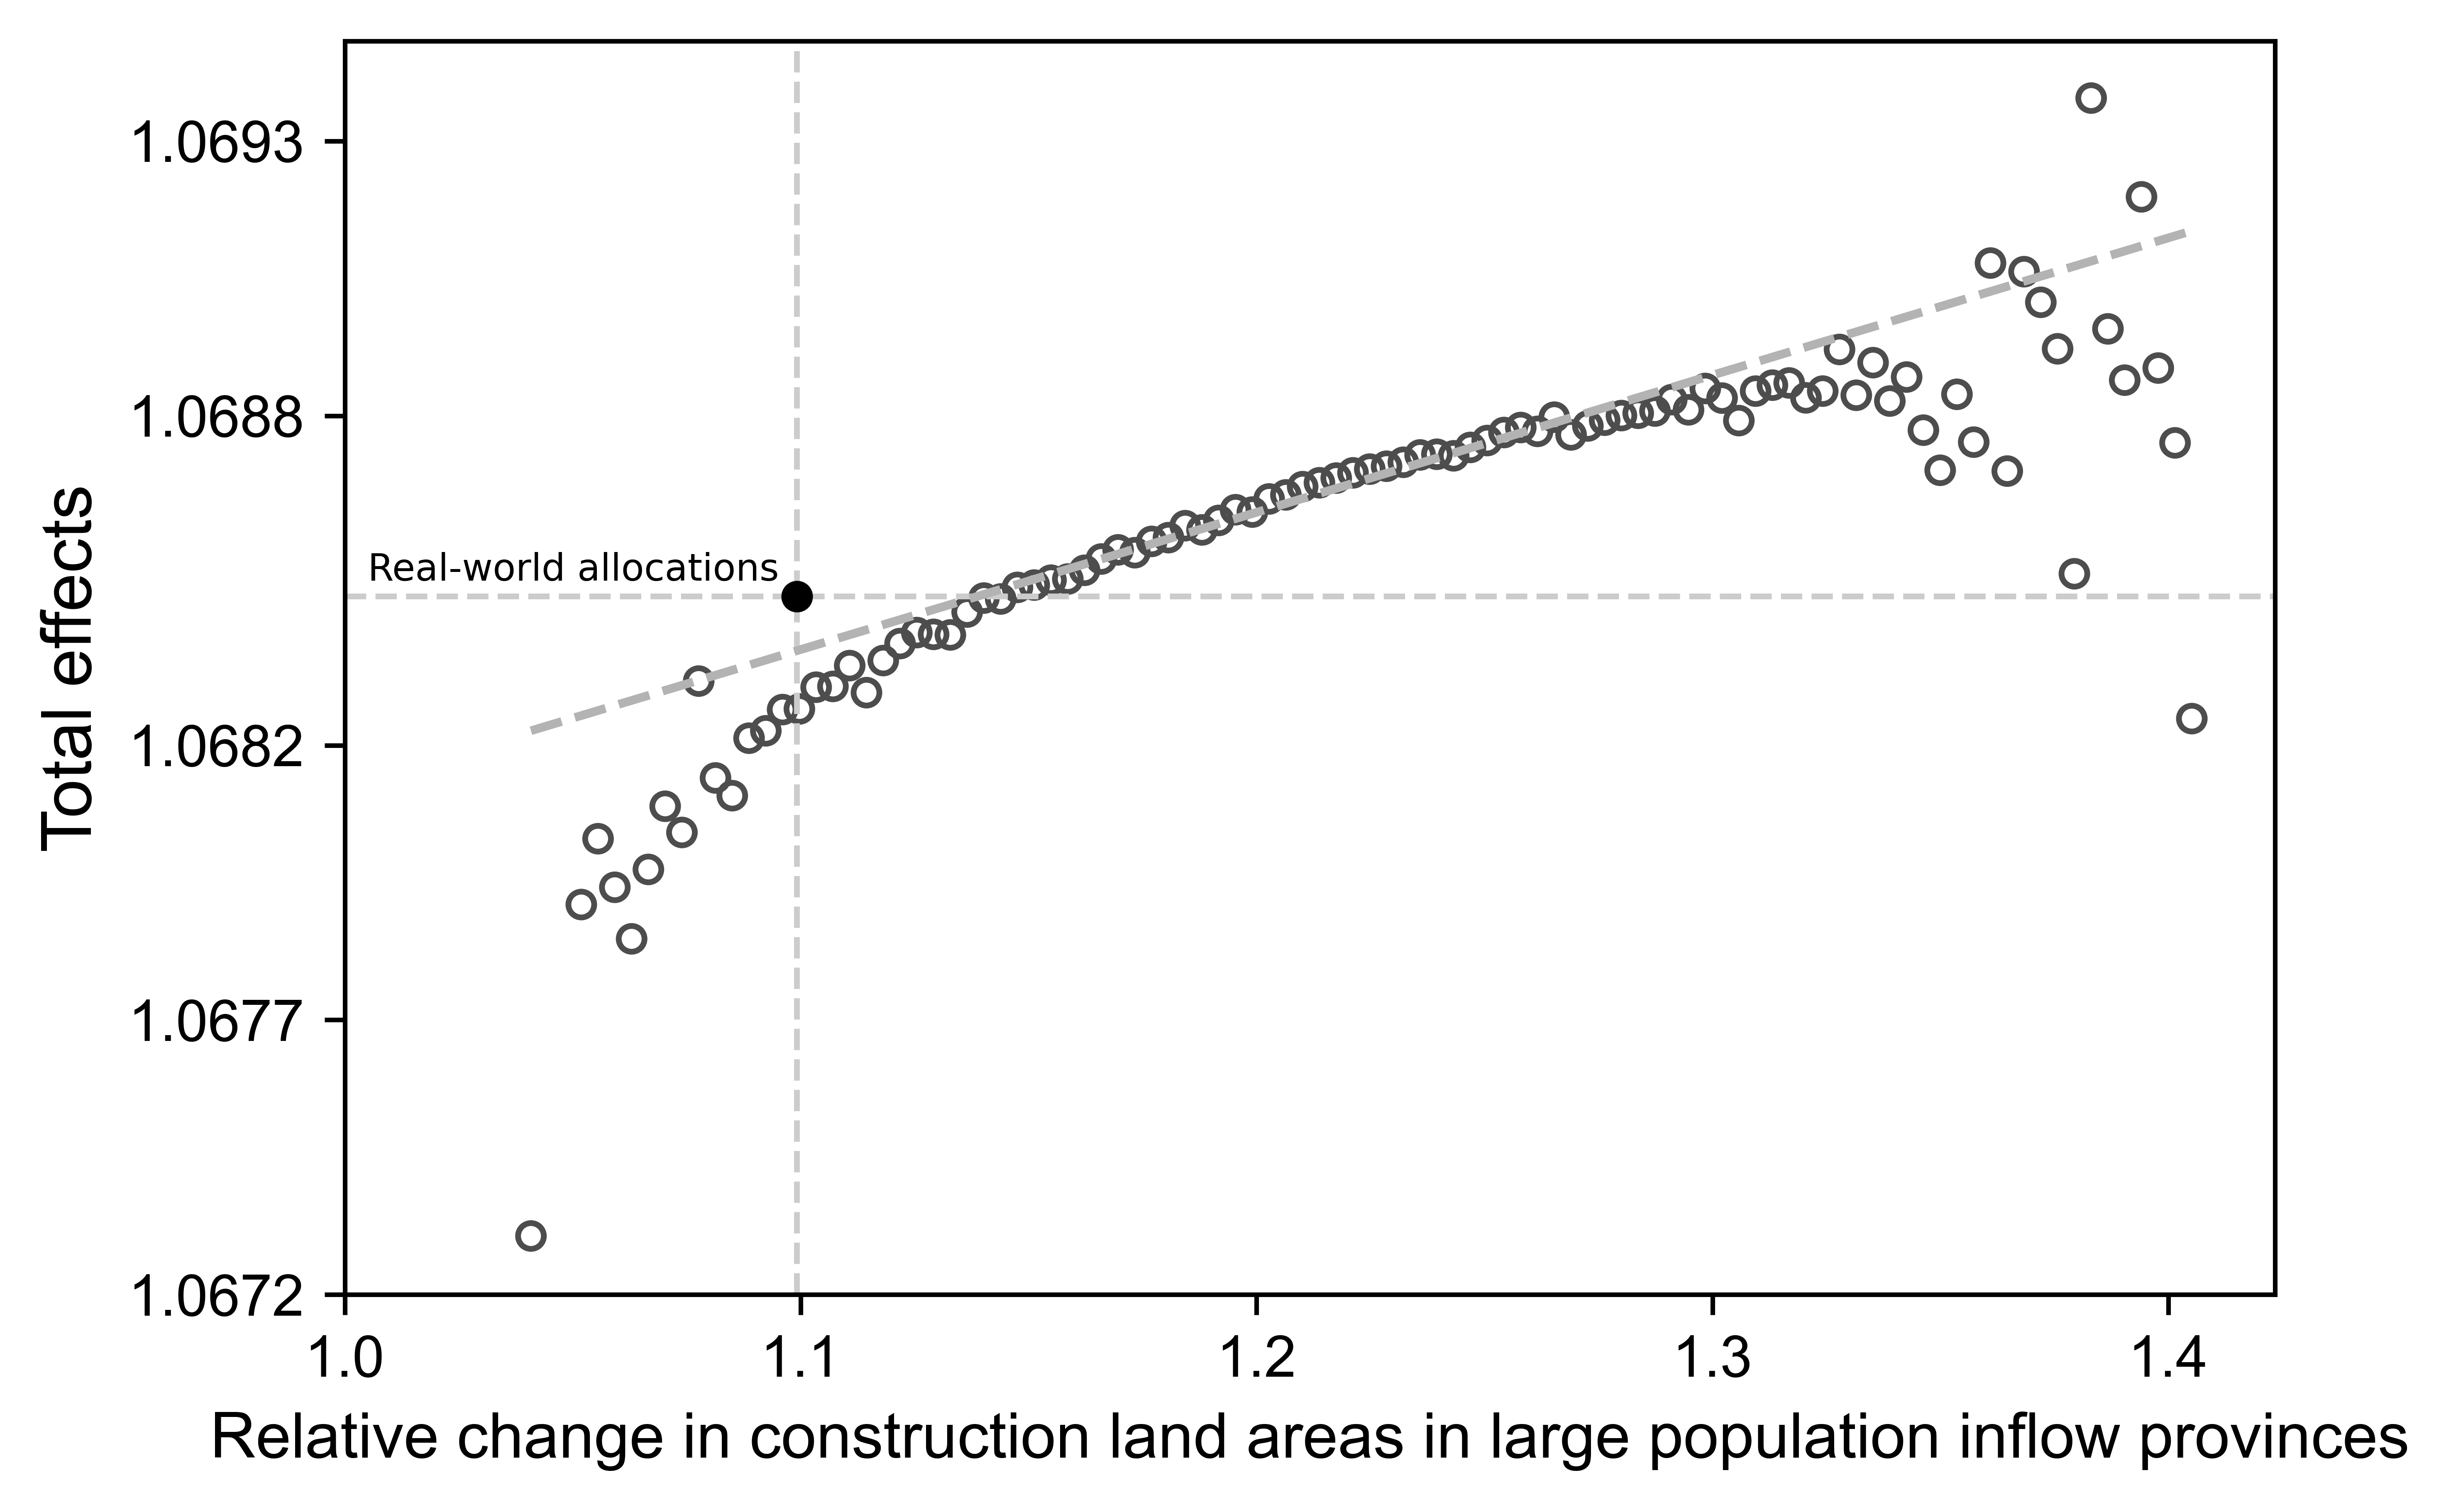

In [ ]:
## better land allocations (2)

dK_high_flow_in_list = list(simulation_results.sort_values(by=['dK_high_flow_in']).loc[:, 'dK_high_flow_in'])
smallest_dK_high_flow_in = dK_high_flow_in_list[0]
highest_dK_high_flow_in = dK_high_flow_in_list[-1]
hist_num = 100
interval_width = (highest_dK_high_flow_in - smallest_dK_high_flow_in) / hist_num
interval_left = [smallest_dK_high_flow_in + i * interval_width for i in range(hist_num)]
interval_right = [smallest_dK_high_flow_in + (i + 1) * interval_width for i in range(hist_num)]

cmogram_data = pd.DataFrame({'interval_left' : interval_left, 'interval_right' : interval_right})
cmogram_data['interval_middle'] = (cmogram_data['interval_right'] + cmogram_data['interval_left']) / 2
cmogram_data['outcome_mean'] = np.nan

for index, row in cmogram_data.iterrows():
    i_interval_left = cmogram_data.loc[index, 'interval_left']
    i_interval_right = cmogram_data.loc[index, 'interval_right']

    if index == 0:
        i_matched_data = simulation_results[
                                            (simulation_results['dK_high_flow_in'] >= i_interval_left) &
                                            (simulation_results['dK_high_flow_in'] <= i_interval_right)
                                        ]
    else:
        i_matched_data = simulation_results[
                                            (simulation_results['dK_high_flow_in'] > i_interval_left) &
                                            (simulation_results['dK_high_flow_in'] <= i_interval_right)
                                        ]

    if len(i_matched_data) > 0:
        cmogram_data.loc[index, 'outcome_mean'] = i_matched_data['total_avg2'].mean()


fig, ax = plt.subplots(dpi=1000)
ax.scatter(cmogram_data['interval_middle'], cmogram_data['outcome_mean'], marker='o', facecolors='none', edgecolors='0.3', s=20)
slope, intercept = np.polyfit(simulation_results['dK_high_flow_in'], simulation_results['total_avg2'], 1)
ax.plot(cmogram_data['interval_middle'], slope * cmogram_data['interval_middle'] + intercept, color='0.7', linestyle='--')
real_world_allocation = 1.099192721992186
real_world_outcomes = (1 + 0.06403) ** (1/3) * (1 + 0.03814) ** (1/3) * (1 - 0.09443) ** (-1/3)
ax.axvline(real_world_allocation, color='0.8', ls='--', lw=1, zorder=1)
ax.axhline(real_world_outcomes, color='0.8', ls='--', lw=1, zorder=1)
ax.scatter(real_world_allocation, real_world_outcomes, marker='o', facecolors='0', edgecolors='0', s=20, zorder=2)

ax.annotate('Real-world allocations', xy=(1.005, 1.0685), size=6.5)

ax.set_xlabel('Relative change in construction land areas in large population inflow provinces', fontproperties=english_font, fontsize=11)
ax.set_ylabel('Total effects', fontproperties=english_font, fontsize=12)
ax.set_yticks([1.0672, 1.0677, 1.0682, 1.0688, 1.0693])
ax.set_xticks([1, 1.1, 1.2, 1.3, 1.4])

for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_fontproperties(english_font)
plt.show()